In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Customer_Analysis.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,1970,Graduation,Divorced,84835.0,SP,1
1,1,1961,Graduation,Single,57091.0,CA,1
2,10476,1958,Graduation,Married,67267.0,US,0
3,1386,1967,Graduation,Together,32474.0,AUS,0
4,5371,1989,Graduation,Single,21474.0,SP,1
...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,US,0
2236,5263,1977,2n Cycle,Married,31056.0,SP,0
2237,22,1976,Graduation,Divorced,46310.0,SP,0
2238,528,1978,Graduation,Married,65819.0,IND,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le_Education = LabelEncoder()
le_Marital_Status = LabelEncoder()
le_Country= LabelEncoder()

In [18]:
data['Education'] = le_Education.fit_transform(data['Education'])
data['Marital_Status'] = le_Marital_Status.fit_transform(data['Marital_Status'])
data['Country'] = le_Country.fit_transform(data['Country'])
data

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,1970,2,2,84835.0,6,1
1,1,1961,2,4,57091.0,1,1
2,10476,1958,2,3,67267.0,7,0
3,1386,1967,2,5,32474.0,0,0
4,5371,1989,2,4,21474.0,6,1
...,...,...,...,...,...,...,...
2235,10142,1976,4,2,66476.0,7,0
2236,5263,1977,0,3,31056.0,6,0
2237,22,1976,2,2,46310.0,6,0
2238,528,1978,2,3,65819.0,3,0


In [19]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA

#Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [20]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,1970,2,2,84835.0,6,1
1,1,1961,2,4,57091.0,1,1


<Axes: >

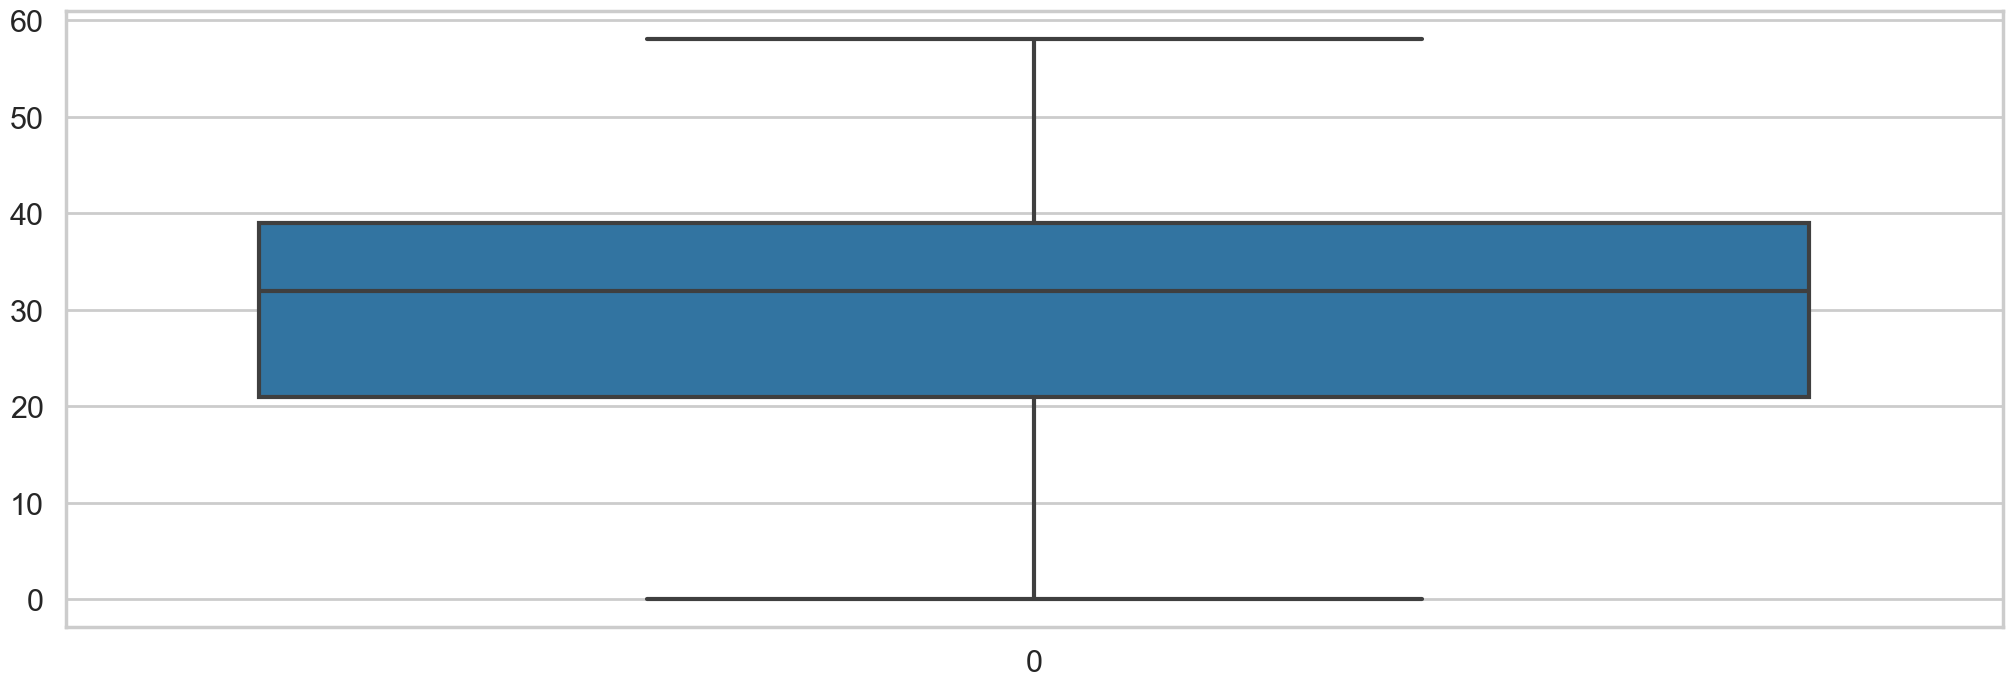

In [32]:
fig=plt.figure(figsize=(25,8))
sns.boxplot(data['Year_Birth'])

<Axes: ylabel='count'>

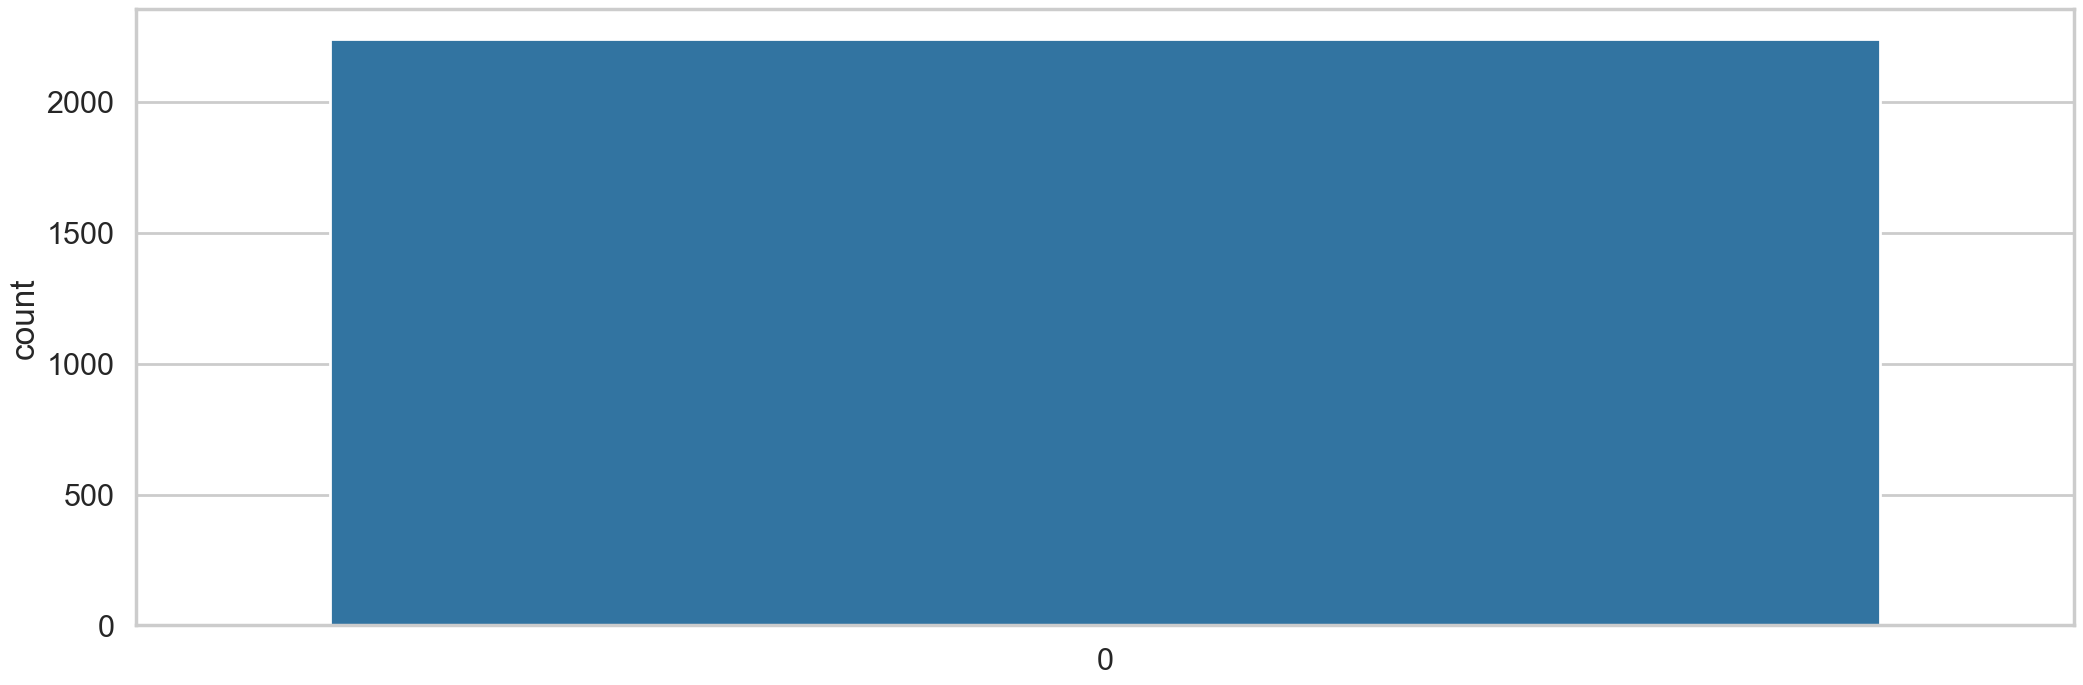

In [21]:
fig=plt.figure(figsize=(25,8))
sns.countplot(data['Marital_Status'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   int64  
 3   Marital_Status  2240 non-null   int64  
 4    Income         2216 non-null   float64
 5   Country         2240 non-null   int64  
 6   Response        2240 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 122.6 KB


In [26]:
data['Year_Birth']=data['Year_Birth'].astype('category')
data['Marital_Status']=data['Marital_Status'].astype('category')
data['Education']=data['Education'].astype('category')

In [27]:
data.dtypes

ID                   int64
Year_Birth        category
Education         category
Marital_Status    category
 Income            float64
Country              int64
Response             int64
dtype: object

In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,1970,2,2,84835.0,6,1
1,1,1961,2,4,57091.0,1,1
2,10476,1958,2,3,67267.0,7,0
3,1386,1967,2,5,32474.0,0,0
4,5371,1989,2,4,21474.0,6,1


In [30]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['Year_Birth']=en.fit_transform(data['Year_Birth'])
data['Marital_Status']=en.fit_transform(data['Marital_Status'])
data['Education']=en.fit_transform(data['Education'])
data['Country']=en.fit_transform(data['Country'])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Country,Response
0,1826,32,2,2,84835.0,6,1
1,1,23,2,4,57091.0,1,1
2,10476,20,2,3,67267.0,7,0
3,1386,29,2,5,32474.0,0,0
4,5371,51,2,4,21474.0,6,1


In [33]:
data.isna().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
 Income           24
Country            0
Response           0
dtype: int64

In [34]:
data=data.fillna(method='bfill')
data.isna().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
 Income           0
Country           0
Response          0
dtype: int64

# K-Means clustering

Text(0, 0.5, 'Error')

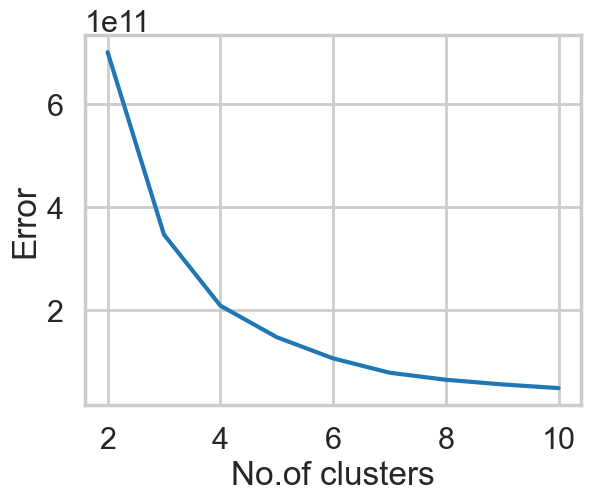

In [35]:
k=list(range(2,11))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)
plt.plot(k,y)
plt.xlabel('No.of clusters')
plt.ylabel('Error')

In [44]:
print(y)

[701557057013.0778, 346280089952.6942, 207989208000.13354, 146636617203.04672, 105392941552.79793, 77495717712.0205, 63735378305.2899, 54711341959.53563, 47461786507.59332]


Text(0, 0.5, 'size')

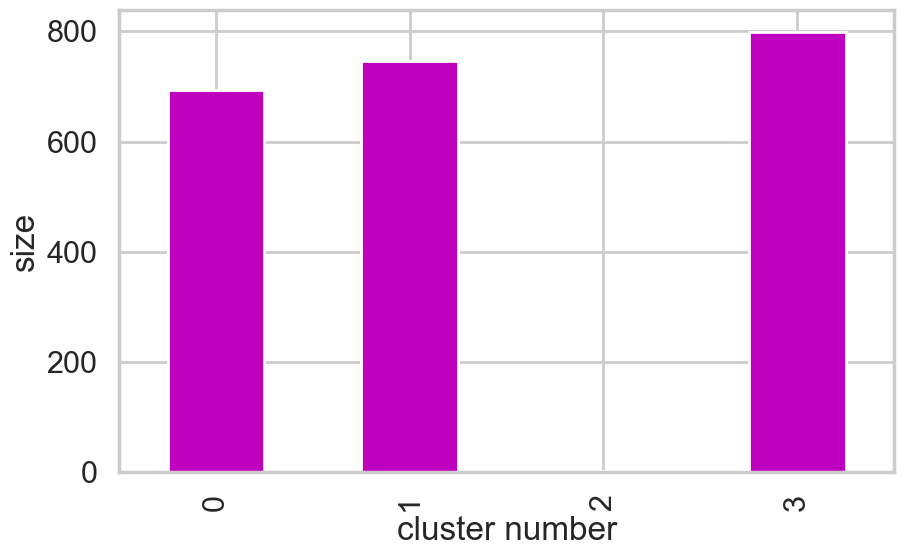

In [36]:
plt.figure(figsize=(10,6))
cluster=KMeans(n_clusters=4,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

Text(0, 0.5, 'size')

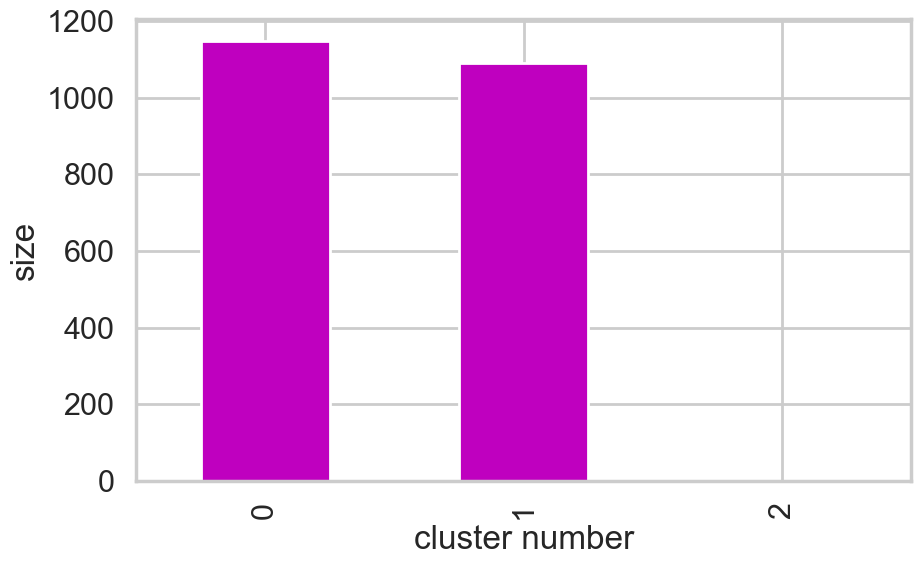

In [37]:
plt.figure(figsize=(10,6))
cluster=KMeans(n_clusters=3,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

[0.5723390686636675, 0.5764341595597205, 0.49137575126439287, 0.45933927056921614, 0.46356353616100077, 0.4410998242867676, 0.405501198961902, 0.3820265575018096, 0.3737599529303387]


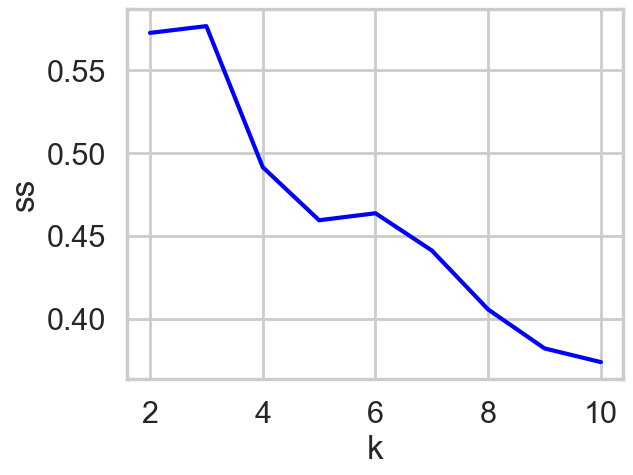

In [39]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(data)
    labels=km.labels_
    ys.append(silhouette_score(data,labels))
    
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

# Affinity Propagation

In [40]:
AP=AffinityPropagation()
AP.fit(data)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation()

C:\Anaconda\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Text(0, 0.5, 'size')

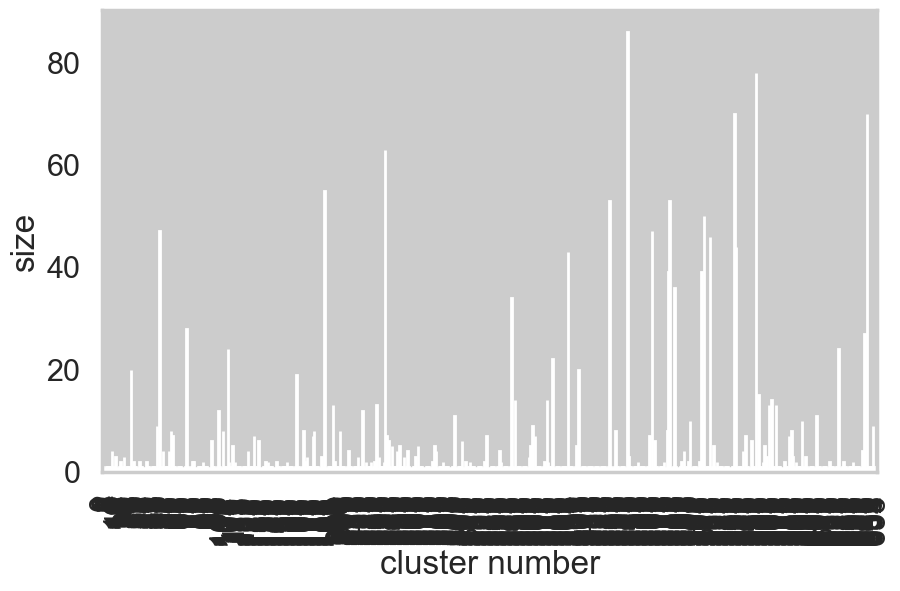

In [41]:
plt.figure(figsize=(10,6))
cluster=AP.fit(data)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

In [42]:
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'random_state': 2,
 'tol': 0.0001,
 'verbose': 0}

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



print('************Performance measures for Logstic regression************')
print('Accuracy Score:\t\n',accuracy_score(y,ys))
print()
print('Confussinon matrix:\n',confusion_matrix(y,ys))
print()
print('Classificatino report: \n',classification_report(y,ys))

************Performance measures for Logstic regression************


C:\Anaconda\Lib\site-packages\sklearn\utils\multiclass.py:330: RuntimeWarning: invalid value encountered in cast
  if y.dtype.kind == "f" and np.any(y != y.astype(int)):


ValueError: continuous is not supported

In [45]:
score(data,y=None,sample_weight=None)

NameError: name 'score' is not defined